In [1]:
import json, pathlib, random, time
from collections import defaultdict
import numpy as np
import pandas as pd
import multiprocessing as mp

from environment import Env, validate_against_hint, load_word_lists, construct_word_df


In [2]:
df = construct_word_df(*load_word_lists())

In [3]:
#https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count


# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

#plt.ion()


In [4]:
#Get number of actions from gym action space
#n_actions = env.action_space.n
n_action_features = 5
n_state_features = 9
n_input_features = n_action_features + n_state_features


def plot_values(vals, axes=['duration', 'episode']):
    plt.figure(2)
    plt.clf()
    plt.title('Training...')
    plt.xlabel(axes[1])
    plt.ylabel(axes[0])
    plt.plot(np.array(vals))
    # Take 20 episode averages and plot them too
    window_width = 20
    if len(vals) >= window_width:
        cumsum_vec = np.cumsum(np.insert(vals, 0, 0)) 
        ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
        plt.plot(np.insert(ma_vec, 0, [None]*int(window_width/2)))

    plt.pause(0.001)  # pause a bit so that plots are updated
    #if is_ipython:
    #    display.clear_output(wait=True)
    #    display.display(plt.gcf())
    
def plot_all(episode_durations, episode_rewards, losses, epsilons, gammas):
    plot_values(episode_durations, axes=['duration', 'episode'])
    plot_values(episode_rewards, axes=['reward', 'episode'])
    if losses: plot_values(losses, axes=['loss', 'step'])
    if epsilons: plot_values(epsilons, axes=['epsilon', 'step'])
    if gammas: plot_values(gammas, axes=['gamma', 'step'])
    #plt.ioff()
    plt.show()

In [5]:

class TrainConfig():
    def __init__(self, train_interval=128, batch_size=128, clear_memory=False, lr=0.01):
        self.train_interval = train_interval
        self.batch_size = batch_size
        self.clear_memory = clear_memory
        self.lr = lr
        
class ValueConfig():
    def __init__(self, name='reward', gamma=[0.9, 0.05, 200]):
        self.name = name
        self.gamma = gamma
        
class ModelConfig():
    def __init__(self, name='naive', startword=None, target_list_only=None):
        self.name = name
        self.startword = startword
        self.target_list_only = target_list_only

In [6]:
#https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
def run_experiment(model=ModelConfig(name='naive', startword=None, target_list_only=False),
                   num_episodes=128,
                   eps=[0.9, 0.05, 200],
                   value_function=ValueConfig(name='reward',gamma=[0.0, 1.0, 200]),
                   training=TrainConfig(clear_memory=False, batch_size=128, train_interval=128)):
    #torch.manual_seed(0)
    random.seed(0)
    np.random.seed(0)
    env = Env(df)
    #memory = ReplayMemory(10000)
    
    steps_done = 0
    last_training = 0
    losses = []
    episode_rewards = []
    episode_durations = []
    epsilons = []
    gammas = []
    
    
    for i_episode in range(num_episodes):
        # Initialize the environment and state
        env.reset()
        print(f'=========================episode {i_episode} {env.target}======================')

        episode_memory = []
        guesses = []
        for t in count():
            steps_done += 1
            # Select and perform an action
            #print(state, actions)
            
            
            #MODEL
            if t == 0 and model.startword:
                chosen_word = model.startword
            else:
                chosen_word = env.sample_word_matching_current_history()
            #/MODEL
            
            
            guesses.append(chosen_word)
            print(f'------guess {t} {guesses[-1]} -------')
            history, reward, done = env.step(chosen_word)
            episode_memory.append(reward)
                       
            print(f'reward {reward} done {done} ')
            
            if done:
                episode_durations.append(t + 1)
                episode_reward = sum(episode_memory)
                print(f'episode {i_episode} finished.  reward {t + 1} {episode_reward} {steps_done}')
                episode_rewards.append(episode_reward)
                break

    print('Complete')
    
    return episode_durations, episode_rewards, losses, epsilons, gammas

#env.render()
#env.close()
#plt.ioff()
#plt.show()

=========================episode 0 lorry======================
------guess 0 syrah -------
reward -1.0 done False 
------guess 1 forby -------
reward -1.0 done False 
------guess 2 porty -------
reward -1.0 done False 
------guess 3 dormy -------
reward -1.0 done False 
------guess 4 corny -------
reward -1.0 done False 
------guess 5 worry -------
reward -1.0 done True 
episode 0 finished.  reward 6 -6.0 6
=========================episode 1 creep======================
------guess 0 stack -------
reward -1.0 done False 
------guess 1 cholo -------
reward -1.0 done False 
------guess 2 ceded -------
reward -1.0 done False 
------guess 3 cuvee -------
reward -1.0 done False 
------guess 4 creep -------
reward 0.0 done True 
episode 1 finished.  reward 5 -4.0 11
=========================episode 2 molar======================
------guess 0 peter -------
reward -1.0 done False 
------guess 1 nadir -------
reward -1.0 done False 
------guess 2 fubar -------
reward -1.0 done False 
------guess

------guess 1 noway -------
reward -1.0 done False 
------guess 2 saags -------
reward -1.0 done False 
------guess 3 madid -------
reward -1.0 done False 
------guess 4 battu -------
reward -1.0 done False 
------guess 5 catch -------
reward 0.0 done True 
episode 24 finished.  reward 6 -5.0 118
=========================episode 25 photo======================
------guess 0 puffa -------
reward -1.0 done False 
------guess 1 preve -------
reward -1.0 done False 
------guess 2 pinon -------
reward -1.0 done False 
------guess 3 poops -------
reward -1.0 done False 
------guess 4 photo -------
reward 0.0 done True 
episode 25 finished.  reward 5 -4.0 123
=========================episode 26 check======================
------guess 0 noser -------
reward -1.0 done False 
------guess 1 exeme -------
reward -1.0 done False 
------guess 2 whelp -------
reward -1.0 done False 
------guess 3 theca -------
reward -1.0 done False 
------guess 4 check -------
reward 0.0 done True 
episode 26 finishe

------guess 3 anime -------
reward 0.0 done True 
episode 49 finished.  reward 4 -3.0 234
=========================episode 50 ultra======================
------guess 0 beefs -------
reward -1.0 done False 
------guess 1 titan -------
reward -1.0 done False 
------guess 2 ratoo -------
reward -1.0 done False 
------guess 3 ultra -------
reward 0.0 done True 
episode 50 finished.  reward 4 -3.0 238
=========================episode 51 splat======================
------guess 0 gecko -------
reward -1.0 done False 
------guess 1 walla -------
reward -1.0 done False 
------guess 2 milia -------
reward -1.0 done False 
------guess 3 yulan -------
reward -1.0 done False 
------guess 4 splat -------
reward 0.0 done True 
episode 51 finished.  reward 5 -4.0 243
=========================episode 52 below======================
------guess 0 gleds -------
reward -1.0 done False 
------guess 1 exalt -------
reward -1.0 done False 
------guess 2 mulie -------
reward -1.0 done False 
------guess 3 felc

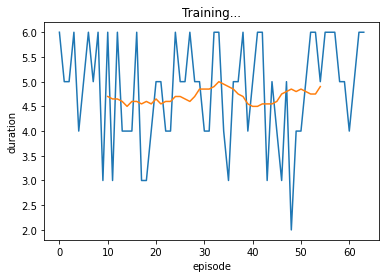

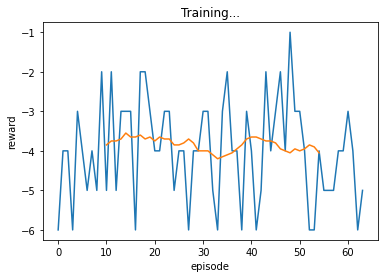

In [7]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword=None, target_list_only=False),
    num_episodes=64
    ))


=========================episode 0 lorry======================
------guess 0 syrah -------
reward -1.0 done False 
------guess 1 forby -------
reward -1.0 done False 
------guess 2 porty -------
reward -1.0 done False 
------guess 3 dormy -------
reward -1.0 done False 
------guess 4 corny -------
reward -1.0 done False 
------guess 5 worry -------
reward -1.0 done True 
episode 0 finished.  reward 6 -6.0 6
=========================episode 1 creep======================
------guess 0 stack -------
reward -1.0 done False 
------guess 1 cholo -------
reward -1.0 done False 
------guess 2 ceded -------
reward -1.0 done False 
------guess 3 cuvee -------
reward -1.0 done False 
------guess 4 creep -------
reward 0.0 done True 
episode 1 finished.  reward 5 -4.0 11
=========================episode 2 molar======================
------guess 0 peter -------
reward -1.0 done False 
------guess 1 nadir -------
reward -1.0 done False 
------guess 2 fubar -------
reward -1.0 done False 
------guess

------guess 1 noway -------
reward -1.0 done False 
------guess 2 saags -------
reward -1.0 done False 
------guess 3 madid -------
reward -1.0 done False 
------guess 4 battu -------
reward -1.0 done False 
------guess 5 catch -------
reward 0.0 done True 
episode 24 finished.  reward 6 -5.0 118
=========================episode 25 photo======================
------guess 0 puffa -------
reward -1.0 done False 
------guess 1 preve -------
reward -1.0 done False 
------guess 2 pinon -------
reward -1.0 done False 
------guess 3 poops -------
reward -1.0 done False 
------guess 4 photo -------
reward 0.0 done True 
episode 25 finished.  reward 5 -4.0 123
=========================episode 26 check======================
------guess 0 noser -------
reward -1.0 done False 
------guess 1 exeme -------
reward -1.0 done False 
------guess 2 whelp -------
reward -1.0 done False 
------guess 3 theca -------
reward -1.0 done False 
------guess 4 check -------
reward 0.0 done True 
episode 26 finishe

------guess 1 wispy -------
reward 0.0 done True 
episode 48 finished.  reward 2 -1.0 230
=========================episode 49 anime======================
------guess 0 goier -------
reward -1.0 done False 
------guess 1 elide -------
reward -1.0 done False 
------guess 2 avine -------
reward -1.0 done False 
------guess 3 anime -------
reward 0.0 done True 
episode 49 finished.  reward 4 -3.0 234
=========================episode 50 ultra======================
------guess 0 beefs -------
reward -1.0 done False 
------guess 1 titan -------
reward -1.0 done False 
------guess 2 ratoo -------
reward -1.0 done False 
------guess 3 ultra -------
reward 0.0 done True 
episode 50 finished.  reward 4 -3.0 238
=========================episode 51 splat======================
------guess 0 gecko -------
reward -1.0 done False 
------guess 1 walla -------
reward -1.0 done False 
------guess 2 milia -------
reward -1.0 done False 
------guess 3 yulan -------
reward -1.0 done False 
------guess 4 spla

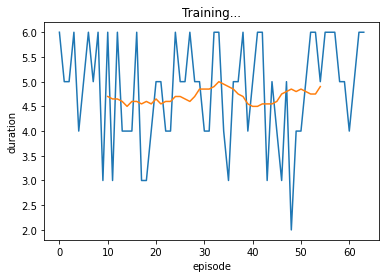

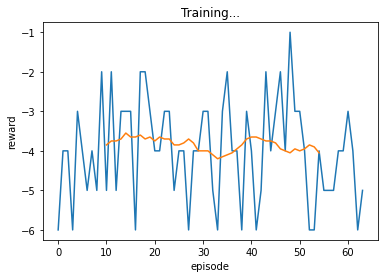

In [8]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword=None, target_list_only=True),
    num_episodes=64
    ))

=========================episode 0 lorry======================
------guess 0 roate -------
reward -1.0 done False 
------guess 1 gormy -------
reward -1.0 done False 
------guess 2 lordy -------
reward -1.0 done False 
------guess 3 lorry -------
reward 0.0 done True 
episode 0 finished.  reward 4 -3.0 4
=========================episode 1 token======================
------guess 0 roate -------
reward -1.0 done False 
------guess 1 moten -------
reward -1.0 done False 
------guess 2 token -------
reward 0.0 done True 
episode 1 finished.  reward 3 -2.0 7
=========================episode 2 plier======================
------guess 0 roate -------
reward -1.0 done False 
------guess 1 query -------
reward -1.0 done False 
------guess 2 sever -------
reward -1.0 done False 
------guess 3 nicer -------
reward -1.0 done False 
------guess 4 wrier -------
reward -1.0 done False 
------guess 5 flier -------
reward -1.0 done True 
episode 2 finished.  reward 6 -6.0 13
=========================epi

------guess 2 pight -------
reward -1.0 done False 
------guess 3 might -------
reward -1.0 done False 
------guess 4 dight -------
reward -1.0 done False 
------guess 5 bight -------
reward -1.0 done True 
episode 25 finished.  reward 6 -6.0 120
=========================episode 26 panel======================
------guess 0 roate -------
reward -1.0 done False 
------guess 1 chela -------
reward -1.0 done False 
------guess 2 navel -------
reward -1.0 done False 
------guess 3 panel -------
reward 0.0 done True 
episode 26 finished.  reward 4 -3.0 124
=========================episode 27 dwelt======================
------guess 0 roate -------
reward -1.0 done False 
------guess 1 thelf -------
reward -1.0 done False 
------guess 2 stell -------
reward -1.0 done False 
------guess 3 knelt -------
reward -1.0 done False 
------guess 4 dwelt -------
reward 0.0 done True 
episode 27 finished.  reward 5 -4.0 129
=========================episode 28 tripe======================
------guess 0 roa

------guess 1 deist -------
reward -1.0 done False 
------guess 2 kempt -------
reward -1.0 done False 
------guess 3 genet -------
reward -1.0 done False 
------guess 4 beget -------
reward 0.0 done True 
episode 50 finished.  reward 5 -4.0 241
=========================episode 51 erupt======================
------guess 0 roate -------
reward -1.0 done False 
------guess 1 treyf -------
reward -1.0 done False 
------guess 2 eruct -------
reward -1.0 done False 
------guess 3 erupt -------
reward 0.0 done True 
episode 51 finished.  reward 4 -3.0 245
=========================episode 52 howdy======================
------guess 0 roate -------
reward -1.0 done False 
------guess 1 focus -------
reward -1.0 done False 
------guess 2 gonzo -------
reward -1.0 done False 
------guess 3 hobby -------
reward -1.0 done False 
------guess 4 howdy -------
reward 0.0 done True 
episode 52 finished.  reward 5 -4.0 250
=========================episode 53 tonal======================
------guess 0 roat

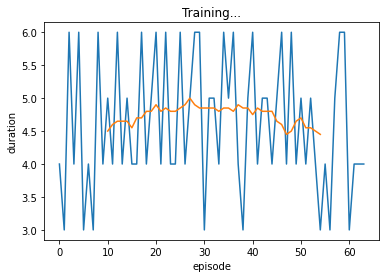

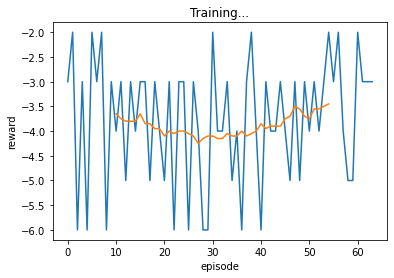

In [9]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword='roate', target_list_only=True),
    num_episodes=64
    ))


=========================episode 0 lorry======================
------guess 0 oater -------
reward -1.0 done False 
------guess 1 wordy -------
reward -1.0 done False 
------guess 2 corky -------
reward -1.0 done False 
------guess 3 porgy -------
reward -1.0 done False 
------guess 4 forby -------
reward -1.0 done False 
------guess 5 horsy -------
reward -1.0 done True 
episode 0 finished.  reward 6 -6.0 6
=========================episode 1 rinse======================
------guess 0 oater -------
reward -1.0 done False 
------guess 1 grike -------
reward -1.0 done False 
------guess 2 birse -------
reward -1.0 done False 
------guess 3 rinse -------
reward 0.0 done True 
episode 1 finished.  reward 4 -3.0 10
=========================episode 2 login======================
------guess 0 oater -------
reward -1.0 done False 
------guess 1 downy -------
reward -1.0 done False 
------guess 2 nolos -------
reward -1.0 done False 
------guess 3 login -------
reward 0.0 done True 
episode 2 fin

------guess 1 diota -------
reward -1.0 done False 
------guess 2 atomy -------
reward -1.0 done False 
------guess 3 afoot -------
reward 0.0 done True 
episode 24 finished.  reward 4 -3.0 119
=========================episode 25 layer======================
------guess 0 oater -------
reward -1.0 done False 
------guess 1 namer -------
reward -1.0 done False 
------guess 2 daker -------
reward -1.0 done False 
------guess 3 laver -------
reward -1.0 done False 
------guess 4 lager -------
reward -1.0 done False 
------guess 5 lacer -------
reward -1.0 done True 
episode 25 finished.  reward 6 -6.0 125
=========================episode 26 nurse======================
------guess 0 oater -------
reward -1.0 done False 
------guess 1 lehrs -------
reward -1.0 done False 
------guess 2 frise -------
reward -1.0 done False 
------guess 3 nurse -------
reward 0.0 done True 
episode 26 finished.  reward 4 -3.0 129
=========================episode 27 juicy======================
------guess 0 oat

------guess 2 dwile -------
reward -1.0 done False 
------guess 3 glens -------
reward -1.0 done False 
------guess 4 fleck -------
reward 0.0 done True 
episode 48 finished.  reward 5 -4.0 230
=========================episode 49 ledge======================
------guess 0 oater -------
reward -1.0 done False 
------guess 1 ulyie -------
reward -1.0 done False 
------guess 2 leeze -------
reward -1.0 done False 
------guess 3 legge -------
reward -1.0 done False 
------guess 4 ledge -------
reward 0.0 done True 
episode 49 finished.  reward 5 -4.0 235
=========================episode 50 issue======================
------guess 0 oater -------
reward -1.0 done False 
------guess 1 heedy -------
reward -1.0 done False 
------guess 2 gimme -------
reward -1.0 done False 
------guess 3 spile -------
reward -1.0 done False 
------guess 4 issue -------
reward 0.0 done True 
episode 50 finished.  reward 5 -4.0 240
=========================episode 51 gawky======================
------guess 0 oate

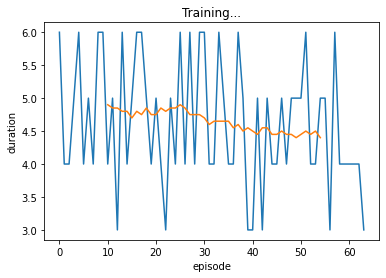

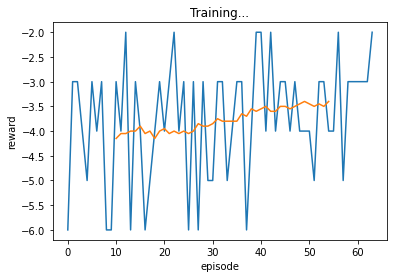

In [10]:
plot_all(*run_experiment(
    model=ModelConfig(name='naive', startword='oater', target_list_only=True),
    num_episodes=64
    ))
